In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
# print info on dataset

data = np.array([[ 105,  245,  685, 147, 193, 156,  720, 253, 488,  19, 360, 1102, 1472, 57, 1374, 375, 54],
                 [ 103,  227,  803, 160, 235, 175,  874, 265, 570, 203, 365, 1137, 1582, 73, 1256, 475, 64],
                 [ 103,  242,  750, 122, 184, 147,  566, 171, 418, 220, 337,  957, 1462, 53, 1572, 458, 62],
                 [  66,  267,  586,  93, 209, 139, 1033, 143, 355, 187, 334,  674, 1494, 47, 1506, 135, 41]],
                dtype=np.float64)
# DEFRA - consumption [grams per person per week]

target_names = ['England', 'Wales', 'Scotland', 'N Ireland']
feature_names = ['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
                 'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg', 'Processed potatoes',
                 'Processed Veg', 'Fresh fruit', 'Cereals', 'Bevarages', 'Soft drinks', 
                 'Alchoolic drinks', 'Confectionery']

# preprocessing (normalization)
# mu = np.mean( dataset.data, axis=0 )
# sigma = np.std( dataset.data, axis=0 )
# data_norm = (dataset.data - mu) / sigma

scale=True
#scale=False

if scale==True:
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)


Text(0,0.5,'2nd eigenvector')

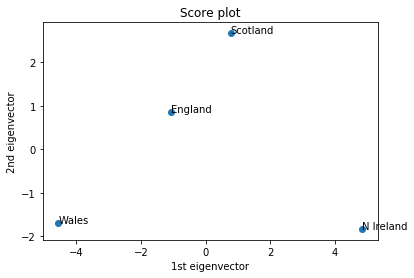

In [18]:
# exploratory analysis using PCA
pca = PCA()
pca.fit(data)
y = pca.transform(data)

fig = plt.figure()
ax = plt.subplot(1,1,1)
x_ = y[:,0]
#y_ = np.zeros_like(y[:,0])
y_ = y[:,1]

ax.scatter(x_, y_)
for ii in range(len(target)):
    ax.text(x_[ii], y_[ii], target_names[ii])

ax.set_title("Score plot")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")

<Container object of 4 artists>

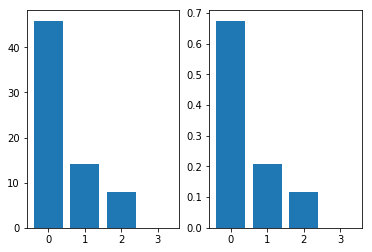

In [19]:
# Eigenspectrum
fig = plt.figure()
ax1, ax2 = fig.subplots(1,2)

ax1.bar(range(0,data.shape[0]), pca.singular_values_**2)
ax2.bar(range(data.shape[0]), pca.explained_variance_ratio_)

Text(0,0.5,'2nd eigenvector')

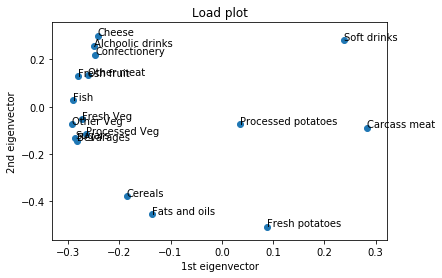

In [20]:
# need to project features in PC1 - PC2
I = np.identity(len(feature_names));
YI = pca.transform(I)
x_ = YI[:,0]
#y_ = np.zeros_like(y[:,0])
y_ = YI[:,1]

fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.scatter(x_, y_)
for ii in range(len(feature_names)):
    ax.text(x_[ii], y_[ii], feature_names[ii])

ax.set_title("Load plot")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
